In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from matplotlib import style
from mlxtend.preprocessing import TransactionEncoder
import time
from time import process_time

In [2]:
csvfile = open('C:\\Users\\84346\\Downloads\\Tài liệu hướng dẫn thực hành buổi 2-20220330\\Data\\groceries.csv')
csvFileArray = []
for row in csv.reader(csvfile):
    csvFileArray.append(row)
csvFileArray[5]

['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']

In [3]:
te = TransactionEncoder()
te_ary = te.fit(csvFileArray).transform(csvFileArray)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
te_ary.astype("int")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
df = df.astype(int)

In [8]:
df.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: int64(169)
memory usage: 12.7 MB


In [10]:
t2_start = process_time() 
itemsets = apriori(df, min_support=0.001, use_colnames=True)
t2_stop = process_time() 
t2 = t2_stop-t2_start
itemsets.head(10)

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)
5,0.002745,(bathroom cleaner)
6,0.052466,(beef)
7,0.033249,(berries)
8,0.026029,(beverages)
9,0.080529,(bottled beer)


In [11]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.9)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         130 non-null    object 
 1   consequents         130 non-null    object 
 2   antecedent support  130 non-null    float64
 3   consequent support  130 non-null    float64
 4   support             130 non-null    float64
 5   confidence          130 non-null    float64
 6   lift                130 non-null    float64
 7   leverage            130 non-null    float64
 8   conviction          130 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.3+ KB


In [12]:
t2

131.759847

In [13]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ' , ', rules.loc[i, 'confidence'], ']')

red/blush wine  ==>  bottled beer [ 0.0019318759532282665  ,  0.9047619047619048 ]
soups  ==>  whole milk [ 0.0011184544992374173  ,  0.9166666666666665 ]
rice  ==>  whole milk [ 0.0012201321809862736  ,  0.9230769230769231 ]
canned fish  ==>  whole milk [ 0.0011184544992374173  ,  1.0 ]
curd  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
onions  ==>  other vegetables [ 0.0011184544992374173  ,  0.9166666666666665 ]
hard cheese  ==>  other vegetables [ 0.0011184544992374173  ,  0.9166666666666665 ]
house keeping products  ==>  whole milk [ 0.0012201321809862736  ,  0.9230769230769231 ]
sweet spreads  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
sugar  ==>  whole milk [ 0.0012201321809862736  ,  1.0 ]
berries  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
domestic eggs  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
whipped/sour cream  ==>  other vegetables [ 0.0011184544992374173  ,  1.0 ]
curd  ==>  whole milk

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

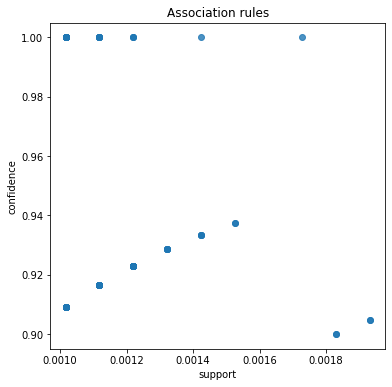

In [14]:
support = rules['support'].values
confidence = rules['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support, y = confidence, fit_reg=False)

In [15]:
t1_start = process_time() 
itemset_F2 = fpgrowth(df, min_support=0.001, use_colnames=True)
t1_stop = process_time() 
t1 = t1_stop-t1_start
itemset_F2.head(10)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.001830,(ready soups)
4,0.139502,(yogurt)
5,0.104931,(tropical fruit)
6,0.058058,(coffee)
7,0.255516,(whole milk)
8,0.075648,(pip fruit)
9,0.039654,(cream cheese)


In [16]:
t1

1.4154410000000155

In [17]:
rules_F2 = association_rules(itemset_F2, metric="confidence", min_threshold=0.9)
rules_F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         130 non-null    object 
 1   consequents         130 non-null    object 
 2   antecedent support  130 non-null    float64
 3   consequent support  130 non-null    float64
 4   support             130 non-null    float64
 5   confidence          130 non-null    float64
 6   lift                130 non-null    float64
 7   leverage            130 non-null    float64
 8   conviction          130 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.3+ KB


In [18]:
rules_F2["antecedents"] = rules_F2["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_F2["consequents"] = rules_F2["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules_F2)):
    print(rules_F2.loc[i, 'antecedents'], ' ==> ', rules_F2.loc[i, 'consequents'],
         '[', rules_F2.loc[i, 'support'], ' , ', rules_F2.loc[i, 'confidence'], ']')

yogurt  ==>  other vegetables [ 0.0014234875444839859  ,  0.9333333333333333 ]
domestic eggs  ==>  whole milk [ 0.0011184544992374173  ,  0.9166666666666665 ]
domestic eggs  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
root vegetables  ==>  whole milk [ 0.0011184544992374173  ,  0.9166666666666665 ]
domestic eggs  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
other vegetables  ==>  whole milk [ 0.0011184544992374173  ,  1.0 ]
cream cheese  ==>  whole milk [ 0.0011184544992374173  ,  0.9166666666666665 ]
other vegetables  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
cream cheese  ==>  whole milk [ 0.0013218098627351296  ,  0.9285714285714285 ]
cream cheese  ==>  other vegetables [ 0.0012201321809862736  ,  0.9230769230769231 ]
cream cheese  ==>  other vegetables [ 0.0011184544992374173  ,  0.9166666666666665 ]
cream cheese  ==>  whole milk [ 0.0010167768174885613  ,  0.9090909090909092 ]
cream cheese  ==>  yogurt [ 0.00101677681

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

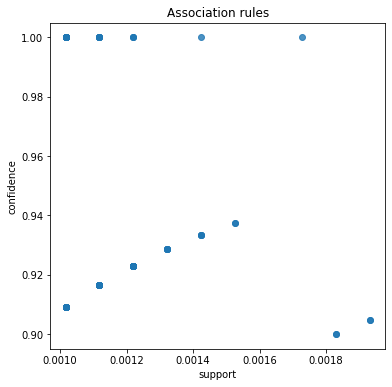

In [19]:
support_F2 = rules_F2['support'].values
confidence_F2 = rules_F2['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support_F2, y = confidence_F2, fit_reg=False)

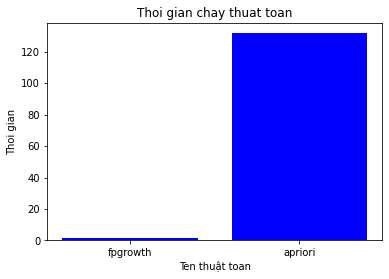

In [20]:
name = ["fpgrowth","apriori"]
point =[t1, t2]
plt.bar(name, point, color='blue')
plt.title("Thoi gian chay thuat toan")
plt.xlabel("Ten thuật toan")
plt.ylabel("Thoi gian")
plt.show()

#### Thuật toán FP-Growth chạy nhanh hơn rất nhiều so với Apriori